In [1]:
#https://iextrading.com/developer/docs/#attribution
#https://pypi.org/project/iexfinance/
#https://github.com/addisonlynch/iexfinance


from iexfinance.stocks import Stock
from datetime import datetime, timedelta
import numpy as np
from iexfinance.stocks import get_historical_data
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# set parameters so all plots are consistent
plt.rcParams['figure.figsize'] = (20, 8)

# prettier plotting with seaborn
import seaborn as sns; 
sns.set(font_scale=1.5)
sns.set_style("whitegrid")


In [2]:
tickerSymbol = input("Ticker Symbol: ")
companyInfo = Stock(tickerSymbol)
stockPrice = companyInfo.get_price()


Ticker Symbol: FB


In [3]:
print("Current Stock Price:",stockPrice)

Current Stock Price: 179.135


In [4]:
print("View Historical Information for the current stock {}:".format(tickerSymbol))
sy, sm, sd = eval(input("input start date as yyyy,m,d: "))
ey, em, ed = eval(input("input end date as yyyy,m,d:"  ))

View Historical Information for the current stock FB:
input start date as yyyy,m,d: 2019,4,1
input end date as yyyy,m,d:2019,4,12


In [5]:
start = datetime(sy,sm,sd)
end = datetime(ey, em,ed)

historicalPrices = get_historical_data(tickerSymbol, start, end)


In [6]:
stockHistoricals = pd.DataFrame(historicalPrices).T


In [7]:
display(stockHistoricals.head())

,close,high,low,open,volume
2019-04-01,168.70,168.90,167.2789,167.83,10381490.0
2019-04-02,174.20,174.90,169.5500,170.14,23946529.0
2019-04-03,173.54,177.96,172.9500,174.50,27590058.0
2019-04-04,176.02,178.00,175.5301,176.02,17847731.0
2019-04-05,175.72,177.00,175.1000,176.88,9594133.0


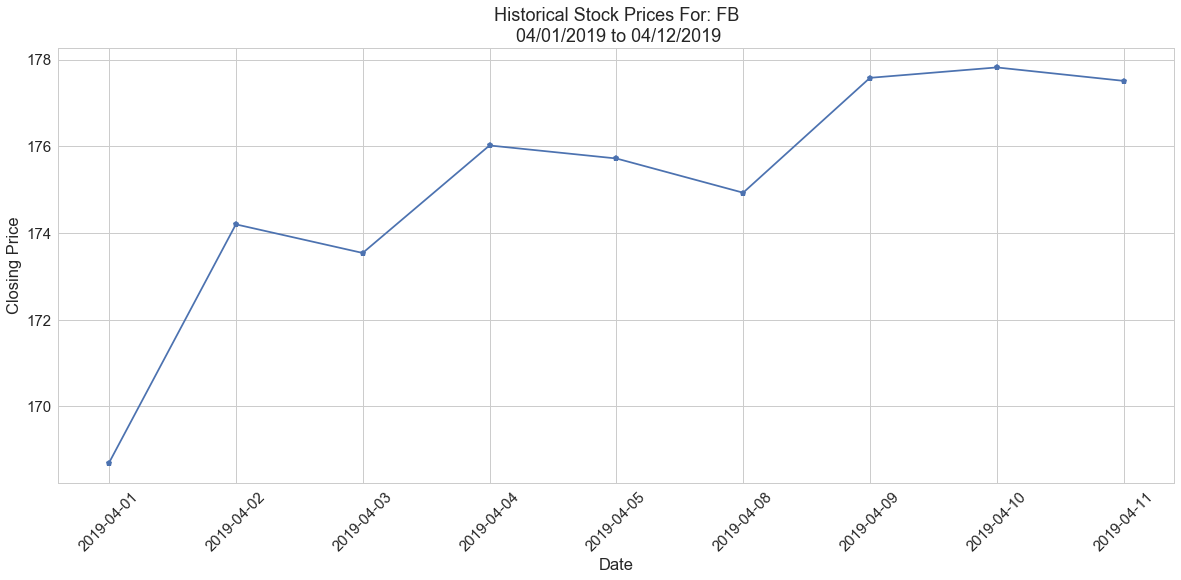

In [8]:
# plot
dformat = "%m/%d/%Y"
fig, ax = plt.subplots()
ax.xaxis_date()
ax.plot_date(stockHistoricals.index.values,stockHistoricals.close,'p-')
ax.set(xlabel="Date", ylabel="Closing Price",)
ax.set_title("Historical Stock Prices For: " + tickerSymbol + "\n " + start.strftime(dformat) + " to " + end.strftime(dformat))
plt.xticks(rotation=45)
plt.show()

In [9]:
#Save Historical Stock Prices to Excel File:
startingDate = (sy*10000)+(sm*100)+sd
endingDate = (ey*10000)+(em*100)+ed

fileName = "HistoricalStockPrices_" + tickerSymbol + "_From_" + str(startingDate) + "_to_"+ str(endingDate)+".xlsx"

stockHistoricals.to_excel(fileName)